Dataset shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

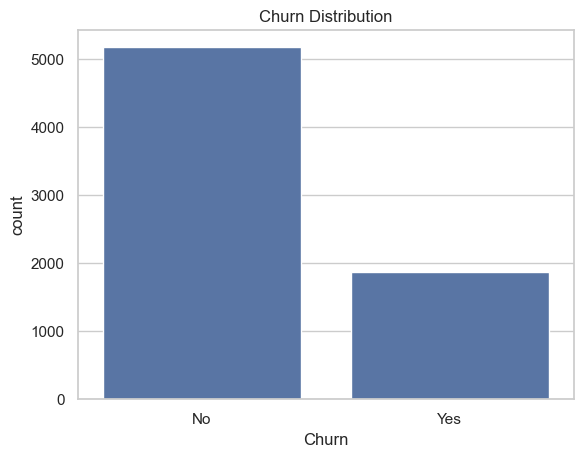

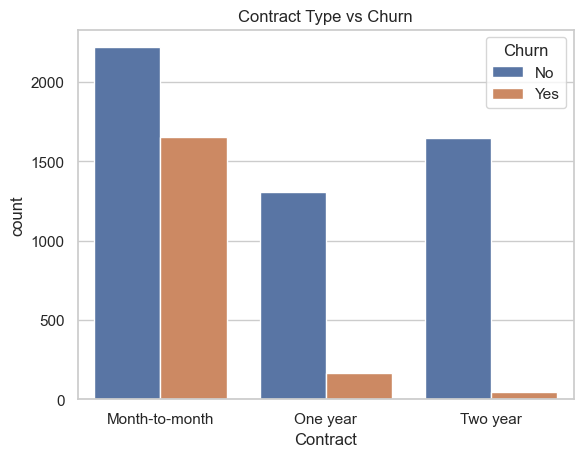

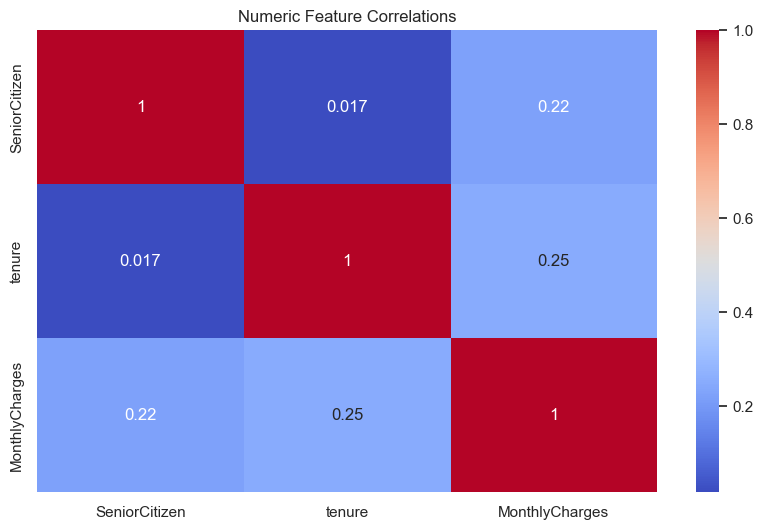

In [27]:
# 01_eda.ipynb

# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visuals
%matplotlib inline
sns.set(style="whitegrid")

# Load data
df = pd.read_csv('../data/raw/telco_churn.csv')  # adjust filename if needed
print(f"Dataset shape: {df.shape}")

# Quick look at data
df.head()

# Summary info
df.info()

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Basic stats for numeric columns
df.describe()

# Target variable distribution (Churn)
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Example: Explore categorical feature 'Contract'
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Contract Type vs Churn')
plt.show()

# Correlation heatmap for numeric features
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Numeric Feature Correlations')
plt.show()


# 🧠 Exploratory Data Analysis - Telco Customer Churn

In this notebook, we perform initial exploration of the Telco customer churn dataset.

## Objectives:
- Understand dataset structure and feature types
- Check for missing or incorrect data types
- Visualize key variables and relationships with churn
- Identify potential features for modeling

## Dataset:
- Rows: 7,043
- Columns: 21
- Target: `Churn` (Yes/No)


### 🔍 Saving Important EDA Charts

In this section, we re-generate and save all important EDA visualizations to the `outputs/eda_charts/` folder for future reference, reporting, and app integration.


In [28]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure output directory exists
output_dir = '../outputs/eda_charts'
os.makedirs(output_dir, exist_ok=True)

# Prepare df copy for visualization
df_viz = df.copy()
df_viz['Churn'] = df_viz['Churn'].map({'No': 'No', 'Yes': 'Yes'})

# Churn distribution plot
sns.countplot(x='Churn', data=df_viz)
plt.title('Churn Distribution')
plt.savefig(f'{output_dir}/churn_distribution.png', bbox_inches='tight')
plt.clf()

# Contract Type vs Churn countplot
sns.countplot(x='Contract', hue='Churn', data=df_viz)
plt.title('Contract Type vs Churn')
plt.savefig(f'{output_dir}/contract_vs_churn.png', bbox_inches='tight')
plt.clf()

# Monthly Charges by Churn boxplot
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_viz)
plt.title('Monthly Charges by Churn')
plt.savefig(f'{output_dir}/monthlycharges_by_churn.png', bbox_inches='tight')
plt.clf()

# Numeric feature correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_viz.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Numeric Feature Correlations')
plt.savefig(f'{output_dir}/numeric_feature_correlation.png', bbox_inches='tight')
plt.clf()


<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

## ✅ Final Sanity Check Before Modeling

Before we move to the next step — **feature encoding and model training**, we do one last verification to ensure the dataset is clean and usable:

- No missing/null values
- Correct data types (especially `TotalCharges`)
- Target column `Churn` is valid

This helps ensure our modeling pipeline works smoothly and we don't run into unexpected issues later.


In [30]:
# Final sanity checks

# Check if any nulls remain
print("✅ Null values check:")
print(df.isnull().sum())

# Re-check dtypes
print("\n✅ Data types:")
print(df.dtypes)

# Unique values in target
print("\n✅ Target variable distribution:")
print(df['Churn'].value_counts())


✅ Null values check:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

✅ Data types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod

### 🔧 Data Type Correction for `TotalCharges`

The `TotalCharges` column was initially read as an `object` type due to non-numeric entries (such as empty strings or spaces).  
Before proceeding with modeling, we need to convert it to `float`.  
We will:
- Replace spaces with `NaN`
- Convert the column to `float`
- Drop any resulting missing rows


In [32]:
# Fix TotalCharges column (object → float)
import numpy as np

# Replace spaces with NaN
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

# Convert to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

# Drop rows where TotalCharges is now NaN
df.dropna(subset=['TotalCharges'], inplace=True)

# Reset index after dropping
df.reset_index(drop=True, inplace=True)

# Confirm conversion
print(df['TotalCharges'].dtype)
print("✅ TotalCharges successfully converted to float.")


float64
✅ TotalCharges successfully converted to float.


## 🔍 Checking Unique Values Before Encoding

Before applying one-hot encoding, it's important to examine the unique values in each categorical feature.

- This helps us identify high-cardinality columns that could cause the dataset to explode in size if encoded directly.
- For columns with many unique categories, we might need to group rare values or use alternative encoding methods.
- This step ensures our feature engineering is efficient and prevents performance issues during modeling.


In [33]:
cat_cols = df.select_dtypes(include='object').columns.drop('Churn')
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")


customerID: 7032 unique values
gender: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
PhoneService: 2 unique values
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 3 unique values
OnlineBackup: 3 unique values
DeviceProtection: 3 unique values
TechSupport: 3 unique values
StreamingTV: 3 unique values
StreamingMovies: 3 unique values
Contract: 3 unique values
PaperlessBilling: 2 unique values
PaymentMethod: 4 unique values


## 🗑️ Dropping Unnecessary Columns Before Encoding

The `customerID` column is a unique identifier for each customer and does not provide predictive value for churn.

- To avoid unnecessary complexity and potential data leakage, we will drop this column.
- We'll save the cleaned dataset without `customerID` for the next steps.


In [34]:
# Drop the customerID column
df = df.drop(columns=['customerID'])

# Save the cleaned dataset without customerID
output_path = '../data/processed/cleaned_for_featuring.csv'
df.to_csv(output_path, index=False)

print(f"✅ Saved cleaned dataset without customerID to {output_path}")
print(f"Dataset shape now: {df.shape}")


✅ Saved cleaned dataset without customerID to ../data/processed/cleaned_for_featuring.csv
Dataset shape now: (7032, 20)


### One-Hot Encoding of Categorical Features

We now apply one-hot encoding to convert categorical columns into numeric format suitable for model training. This ensures machine learning models can process them effectively. The output will be saved and used for training in the next notebook.


In [53]:

import pandas as pd

# Load the cleaned dataset
df = pd.read_csv('../data/processed/cleaned_for_featuring.csv')

# Separate the target column
target = df['Churn']
features = df.drop(columns=['Churn'])

# Perform one-hot encoding on categorical features
features_encoded = pd.get_dummies(features, drop_first=True)

# Combine encoded features with target
df_final = pd.concat([features_encoded, target], axis=1)

# Check the shape and sample
print(f"Shape after encoding: {df_final.shape}")
df_final.head()


Shape after encoding: (7032, 31)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,No
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,No
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,Yes
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,No
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,Yes


In [54]:
df_final.to_csv('../data/processed/final_encoded_for_model.csv', index=False)


### ✅ Casual Save

We've completed all necessary data preprocessing steps including:
- Handling missing values  
- Converting data types  
- One-hot encoding categorical features  
- Converting the target variable (`Churn`) to numeric  

We now save this final, model-ready dataset for training and evaluation in the next step.


In [55]:
import pandas as pd

# Load cleaned data
df = pd.read_csv('../data/processed/final_encoded_for_model.csv')

# Convert Churn column to numeric (Yes=1, No=0)
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Separate target
target = df['Churn']
features = df.drop(columns=['Churn'])

# One-hot encode categorical features
features_encoded = pd.get_dummies(features, drop_first=True)

# Combine encoded features with numeric target
df_final = pd.concat([features_encoded, target], axis=1)

# Save final dataset
df_final.to_csv('../data/processed/modelling_file.csv', index=False)

print("✅ Final encoded dataset saved. Shape:", df_final.shape)


✅ Final encoded dataset saved. Shape: (7032, 31)


### 🚀 Ready for Modeling

We are now ready to move to the next phase of the project: **Model Training and Evaluation**.

➡️ Open `02_modelling.ipynb`  
We'll begin by loading the processed data, splitting it into training and test sets, and training classification models to predict customer churn.


In [1]:
import pandas as pd

# Load your one-hot encoded dataset
df = pd.read_csv('../data/processed/modelling_file.csv')

# Print the first 5 rows
print("Dataframe head:")
print(df.head())

# Print all column names
print("\nColumns:")
print(df.columns.tolist())


Dataframe head:
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0              0       1           29.85         29.85        False   
1              0      34           56.95       1889.50         True   
2              0       2           53.85        108.15         True   
3              0      45           42.30       1840.75         True   
4              0       2           70.70        151.65        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  MultipleLines_Yes  ...  StreamingTV_Yes  \
0                            True              False  ...            False   
1                           False              False  ...            False   
2         